#### Activity 05

Today you will work with extrasolar planets. 

On Monday you sae how radii of extrasolar planets can be computed using the drop in the star flux while a planet passes in front of the star. 

The file "Planet_Radii.csv" includes the radii of a large sample of extrasolar planets identified by the Kepler telescope. 
The data were taken from [here](https://exoplanetarchive.ipac.caltech.edu/docs/data.html). 

You will use the reported data to estimate the parameter $\mu$ of the LogNormal distribution marginalizing over the value of $\lambda$. 

In the analysis, as usual, follow the best practice guidelines posted on Canvas.  


1. Import packages and set random seed

In [4]:
# Python code
import random
import numpy as np
from scipy.stats import poisson
import pandas as pd
from astropy.io import ascii
import matplotlib.pyplot as plt

random.seed(5731) # always set your seed

2. Read in Data and Visual Inspection

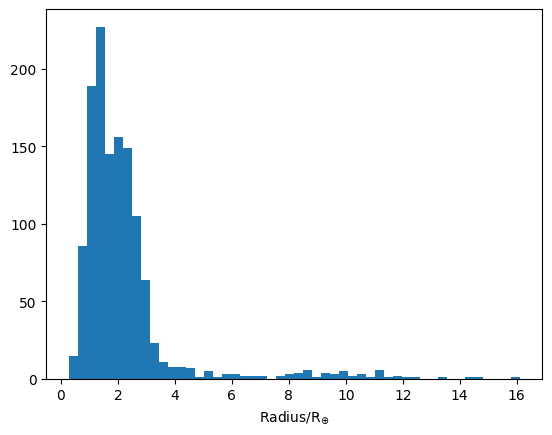

In [5]:
data = ascii.read("Planet_radii.csv")
plt.hist(data['Radius'], 50)
plt.xlabel(r'Radius/R$_{\oplus}$')
plt.show()

In [6]:
data_pf = pd.DataFrame(data['Radius'])
print(data_pf.describe(percentiles=[.25, .5, .75]))

            Radius
count  1261.000000
mean      2.203620
std       1.869886
min       0.270000
25%       1.250000
50%       1.780000
75%       2.450000
max      16.100000


In [10]:
radius = np.array(data['Radius'])
log_radius = np.log(radius)
mean_radius = np.mean(log_radius)
log_radius_unbiased_var = np.var(log_radius,ddof=1)
length_data = len(radius)
print('mean radius, log radius unbiased var,length of data')
print(np.round(mean_radius,4), np.round(log_radius_unbiased_var,4),np.round(length_data,4))

mean radius, log radius unbiased var,length of data
0.5962 0.3231 1261


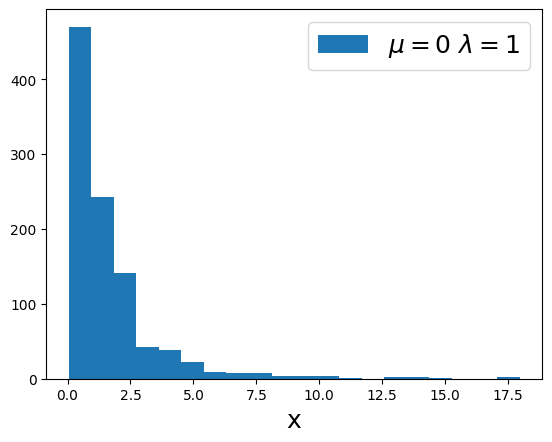

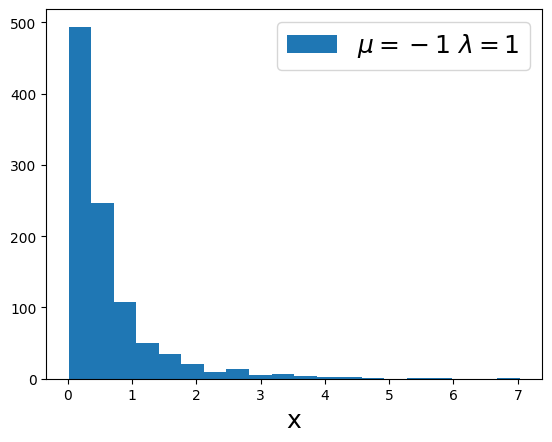

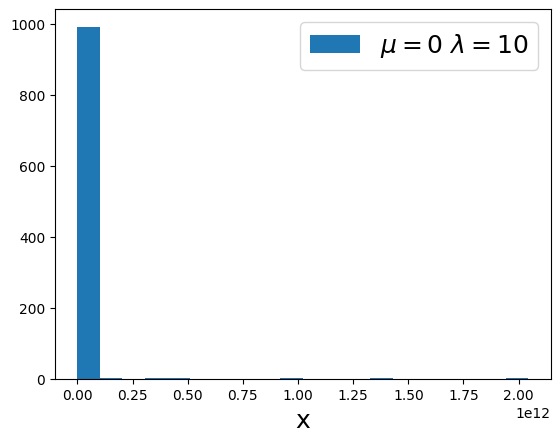

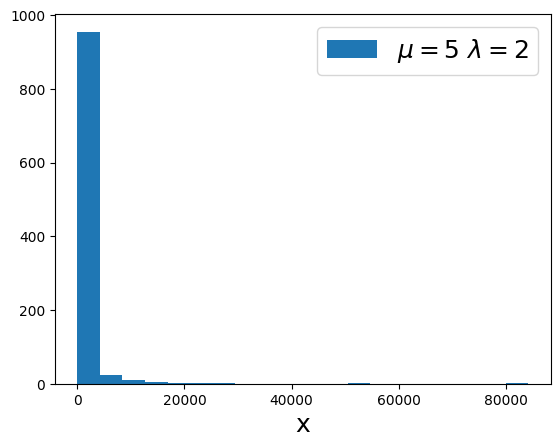

In [11]:
#Use numpy random log normal package to simulate data
import matplotlib.pyplot as plt
import numpy as np
msim = 1000
random.seed(5731)
sim_dat1 = np.random.lognormal(0,np.sqrt(1),msim)
sim_dat2 = np.random.lognormal(-1,np.sqrt(1),msim)
sim_dat3 = np.random.lognormal(0,np.sqrt(100.),msim)
sim_dat4 = np.random.lognormal(5,np.sqrt(4),msim)
plt.hist(sim_dat1,label=r'$\mu=0$ $\lambda=1$',bins=20)
plt.legend(fontsize=18)
plt.xlabel('x',fontsize=18)
plt.show()
plt.hist(sim_dat2,label=r'$\mu=-1$ $\lambda=1$',bins=20)
plt.legend(fontsize=18)
plt.xlabel('x',fontsize=18)
plt.show()
plt.hist(sim_dat3,label=r'$\mu=0$ $\lambda=10$',bins=20)
plt.legend(fontsize=18)
plt.xlabel('x',fontsize=18)
plt.show()
plt.hist(sim_dat4,label=r'$\mu=5$ $\lambda=2$',bins=20)
plt.legend(fontsize=18)
plt.xlabel('x',fontsize=18)
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.5647994993839003, 0.6276026292604411)


Text(0.5, 0, '$\\mu$')

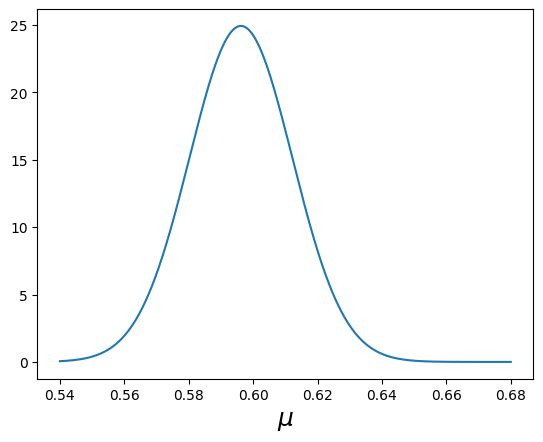

In [28]:
#95% confidence interval
import scipy as sp

sigma = np.sqrt(log_radius_unbiased_var) / np.sqrt(length_data)
mu = mean_radius
nu = length_data-1

credible_interval = sp.stats.t.interval(0.95,df=nu,loc=mu,scale=sigma)
x = np.linspace(0.54,0.68,1000)

print(credible_interval)

plt.plot(x,sp.stats.t.pdf(x,df=nu,loc=mu, scale=sigma))
#plt.fill_between(np.linspace(*(credible_interval),200),sp.stats.t.pdf(np.linspace(*(credible_interval))))
#plt.vlines(x[np.argmax(sp.stats.t.pdf(x,df=nu,loc=mu,scale=sigma))], ymin:)

plt.legend(frameon=False,fontsize=9.5)
plt.xlabel(r'$\mu$',fontsize=18)
